In [234]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [235]:
athlete_events = pd.read_csv("kaggle-csvs/athlete_events.csv")
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [236]:
athlete_events_condense = athlete_events[['Name','Sex','Age','Team','Games','City','Event','Medal',"Year"]]
athlete_events_condense.head()

,Name,Sex,Age,Team,Games,City,Event,Medal,Year
0,A Dijiang,M,24.0,China,1992 Summer,Barcelona,Basketball Men's Basketball,NaN,1992
1,A Lamusi,M,23.0,China,2012 Summer,London,Judo Men's Extra-Lightweight,NaN,2012
2,Gunnar Nielsen Aaby,M,24.0,Denmark,1920 Summer,Antwerpen,Football Men's Football,NaN,1920
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900 Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,1900
4,Christine Jacoba Aaftink,F,21.0,Netherlands,1988 Winter,Calgary,Speed Skating Women's 500 metres,NaN,1988


In [237]:
athlete_events_gold = athlete_events_condense[athlete_events_condense['Medal'] == "Gold"]
athlete_events_silver = athlete_events_condense[athlete_events_condense['Medal'] == "Silver"]
athlete_events_bronze = athlete_events_condense[athlete_events_condense['Medal'] == "Bronze"]
athlete_events_metalists = athlete_events_condense[
    (athlete_events_condense['Medal'] == "Bronze") |
    (athlete_events_condense['Medal'] == "Silver") |
    (athlete_events_condense['Medal'] == "Gold")
    ]

In [238]:
athlete_events_metalists

,Name,Sex,Age,Team,Games,City,Event,Medal,Year
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900 Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,1900
37,Arvo Ossian Aaltonen,M,30.0,Finland,1920 Summer,Antwerpen,Swimming Men's 200 metres Breaststroke,Bronze,1920
38,Arvo Ossian Aaltonen,M,30.0,Finland,1920 Summer,Antwerpen,Swimming Men's 400 metres Breaststroke,Bronze,1920
40,Juhamatti Tapio Aaltonen,M,28.0,Finland,2014 Winter,Sochi,Ice Hockey Men's Ice Hockey,Bronze,2014
41,Paavo Johannes Aaltonen,M,28.0,Finland,1948 Summer,London,Gymnastics Men's Individual All-Around,Bronze,1948
...,...,...,...,...,...,...,...,...,...
271078,Galina Ivanovna Zybina (-Fyodorova),F,25.0,Soviet Union,1956 Summer,Melbourne,Athletics Women's Shot Put,Silver,1956
271080,Galina Ivanovna Zybina (-Fyodorova),F,33.0,Soviet Union,1964 Summer,Tokyo,Athletics Women's Shot Put,Bronze,1964
271082,Bogusaw Zych,M,28.0,Poland,1980 Summer,Moskva,"Fencing Men's Foil, Team",Bronze,1980
271102,Olesya Nikolayevna Zykina,F,19.0,Russia,2000 Summer,Sydney,Athletics Women's 4 x 400 metres Relay,Bronze,2000


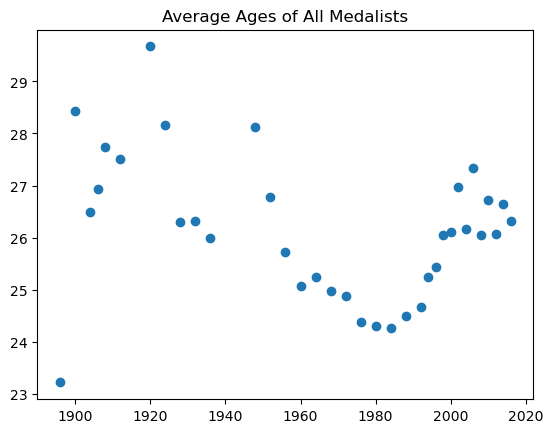

In [239]:
age_average_metalists = pd.DataFrame(athlete_events_metalists.groupby('Year')['Age'].mean()).reset_index()
x_values = age_average_metalists['Year']
y_values = age_average_metalists['Age']

plt.scatter(x_values,y_values)
plt.title("Average Ages of All Medalists")
plt.show()

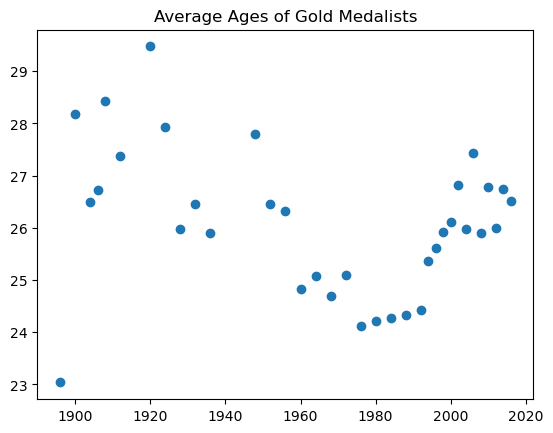

In [240]:
#years = athlete_events_gold['Year']
#age = athlete_events_gold['Age']
age_average_gold = pd.DataFrame(athlete_events_gold.groupby('Year')['Age'].mean()).reset_index()
x_values = age_average_gold['Year']
y_values = age_average_gold['Age']

plt.scatter(x_values,y_values)
plt.title("Average Ages of Gold Medalists")
plt.show()

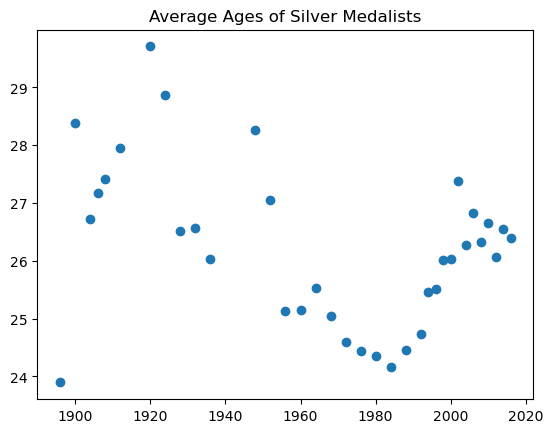

In [241]:
age_average_silver = pd.DataFrame(athlete_events_silver.groupby('Year')['Age'].mean()).reset_index()
x_values = age_average_silver['Year']
y_values = age_average_silver['Age']

plt.scatter(x_values,y_values)
plt.title("Average Ages of Silver Medalists")
plt.show()

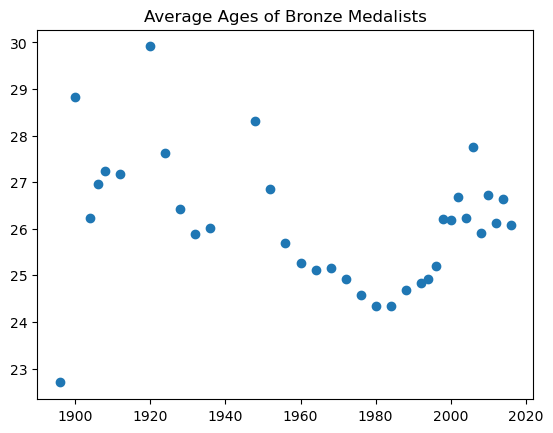

In [242]:
age_average_bronze = pd.DataFrame(athlete_events_bronze.groupby('Year')['Age'].mean()).reset_index()
x_values = age_average_bronze['Year']
y_values = age_average_bronze['Age']

plt.scatter(x_values,y_values)
plt.title("Average Ages of Bronze Medalists")
plt.show()

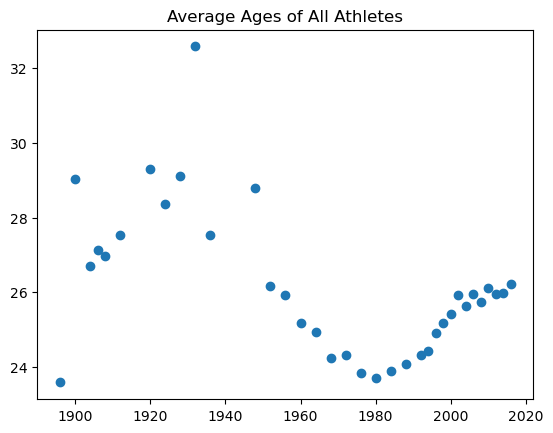

In [243]:
age_average_all = pd.DataFrame(athlete_events.groupby('Year')['Age'].mean()).reset_index()
x_values = age_average_all['Year']
y_values = age_average_all['Age']

plt.scatter(x_values,y_values)
plt.title("Average Ages of All Athletes")
plt.show()

In [244]:
age_average_dataframe = pd.merge(age_average_metalists,age_average_gold, on="Year", suffixes=(' All Medalists', ' Gold'))
age_average_dataframe = pd.merge(age_average_dataframe,age_average_silver, on="Year")
age_average_dataframe = pd.merge(age_average_dataframe,age_average_bronze, on="Year")
age_average_dataframe = pd.merge(age_average_dataframe, age_average_all, on="Year")

age_average_dataframe = age_average_dataframe.rename(columns={"Age All Medalists": "All Medalists",
                                                              "Age Gold": "Gold", "Age_x": "Silver",
                                                              "Age_y": "Bronze", "Age": "All Athletes"})

age_average_dataframe.head()

,Year,All Medalists,Gold,Silver,Bronze,All Athletes
0,1896,23.217822,23.038462,23.896552,22.700000,23.580645
1,1900,28.433761,28.178771,28.389937,28.838462,29.034031
2,1904,26.485782,26.500000,26.718519,26.220472,26.698150
3,1906,26.931596,26.730159,27.173469,26.951807,27.125253
4,1908,27.739869,28.428070,27.423868,27.236287,26.970228


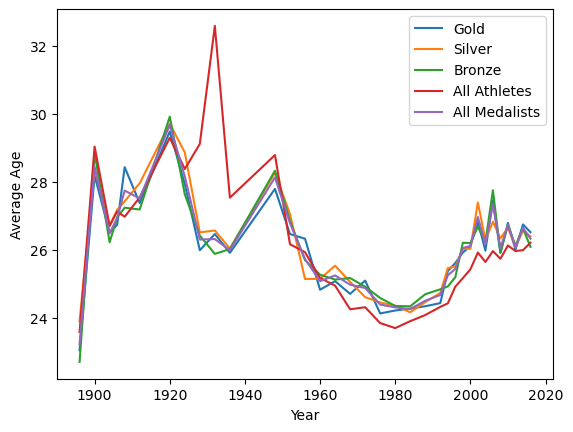

In [245]:
plt.plot(age_average_dataframe['Year'],age_average_dataframe['Gold'], label= 'Gold')
plt.plot(age_average_dataframe['Year'],age_average_dataframe['Silver'], label= 'Silver')
plt.plot(age_average_dataframe['Year'],age_average_dataframe['Bronze'], label= 'Bronze')
plt.plot(age_average_dataframe['Year'],age_average_dataframe['All Athletes'], label= 'All Athletes')
plt.plot(age_average_dataframe['Year'],age_average_dataframe['All Medalists'], label= 'All Medalists')

plt.xlabel("Year")
plt.ylabel("Average Age")
plt.legend()
plt.show()

In [274]:
track_and_field_df = athlete_events[athlete_events["Sport"] == "Athletics"]

tnf_events_gold = track_and_field_df[track_and_field_df['Medal'] == "Gold"]
tnf_events_silver = track_and_field_df[track_and_field_df['Medal'] == "Silver"]
tnf_events_bronze = track_and_field_df[track_and_field_df['Medal'] == "Bronze"]
tnf_events_metalists = track_and_field_df[
    (track_and_field_df['Medal'] == "Bronze") |
    (track_and_field_df['Medal'] == "Silver") |
    (track_and_field_df['Medal'] == "Gold")
    ]

In [275]:
tnf_average_age_gold = pd.DataFrame(tnf_events_gold.groupby('Year')['Age'].mean()).reset_index()
tnf_average_age_silver = pd.DataFrame(tnf_events_silver.groupby('Year')['Age'].mean()).reset_index()
tnf_average_age_bronze = pd.DataFrame(tnf_events_bronze.groupby('Year')['Age'].mean()).reset_index()
tnf_average_age_all = pd.DataFrame(track_and_field_df.groupby('Year')['Age'].mean()).reset_index()
tnf_average_age_metalists = pd.DataFrame(tnf_events_metalists.groupby('Year')['Age'].mean()).reset_index()

In [281]:
age_average_dataframe_tnf = pd.merge(tnf_average_age_gold,tnf_average_age_silver, on="Year", suffixes=(' Gold', ' Silver'))
age_average_dataframe_tnf = pd.merge(age_average_dataframe_tnf,tnf_average_age_bronze, on="Year")
age_average_dataframe_tnf = pd.merge(age_average_dataframe_tnf,tnf_average_age_all, on="Year")
age_average_dataframe_tnf = pd.merge(age_average_dataframe_tnf, tnf_average_age_metalists, on="Year")

age_average_dataframe_tnf = age_average_dataframe_tnf.rename(columns={"Age Gold": "Gold", "Age Silver": "Silver", 
                                                                      "Age_x": "Bronze", "Age_y": "All Track & Field Athletes",
                                                                      "Age": "All Track & Field Medalists"})

age_average_dataframe_tnf.head()

,Year,Gold,Silver,Bronze,All Track & Field Athletes,All Track & Field Medalists
0,1896,21.916667,22.400000,23.000000,22.434783,22.344828
1,1900,24.148148,23.346154,22.909091,22.864486,23.506667
2,1904,24.571429,22.958333,23.090909,23.747191,23.608108
3,1906,26.428571,25.043478,23.842105,24.277955,25.142857
4,1908,25.705882,24.500000,24.363636,23.778561,24.861386


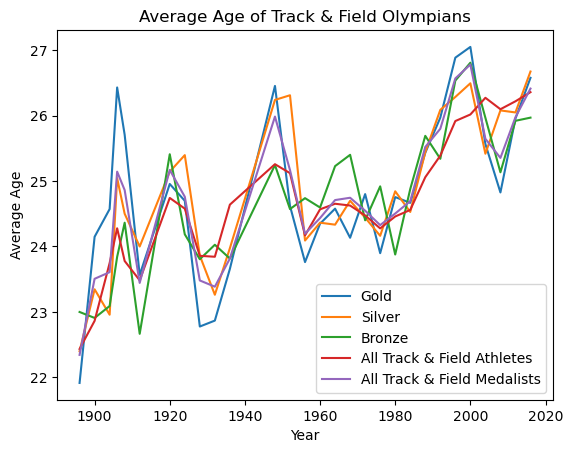

In [284]:
plt.plot(age_average_dataframe_tnf['Year'],age_average_dataframe_tnf['Gold'], label= 'Gold')
plt.plot(age_average_dataframe_tnf['Year'],age_average_dataframe_tnf['Silver'], label= 'Silver')
plt.plot(age_average_dataframe_tnf['Year'],age_average_dataframe_tnf['Bronze'], label= 'Bronze')
plt.plot(age_average_dataframe_tnf['Year'],age_average_dataframe_tnf['All Track & Field Athletes'], label= 'All Track & Field Athletes')
plt.plot(age_average_dataframe_tnf['Year'],age_average_dataframe_tnf['All Track & Field Medalists'], label= 'All Track & Field Medalists')

plt.xlabel("Year")
plt.ylabel("Average Age")
plt.title("Average Age of Track & Field Olympians")
plt.legend()
plt.show()

In [251]:
# female and male comparison


female_data = athlete_events[athlete_events['Sex'] == 'F']
female_data = female_data.groupby('Year')['Sex'].count()
female_data = pd.DataFrame(female_data).reset_index()
female_data.rename(columns={'Sex':'Female'}, inplace=True)
male_data = athlete_events[athlete_events['Sex'] == 'M']
male_data = male_data.groupby('Year')['Sex'].count()
male_data = pd.DataFrame(male_data).reset_index()
male_data.rename(columns={'Sex':'Male'}, inplace=True)
gender_data_merge = pd.merge(female_data,male_data,on='Year',how='right')
gender_data_merge

,Year,Female,Male
0,1896,NaN,380
1,1900,33.0,1903
2,1904,16.0,1285
3,1906,11.0,1722
4,1908,47.0,3054
5,1912,87.0,3953
6,1920,134.0,4158
7,1924,261.0,5432
8,1928,437.0,5137
9,1932,369.0,2952


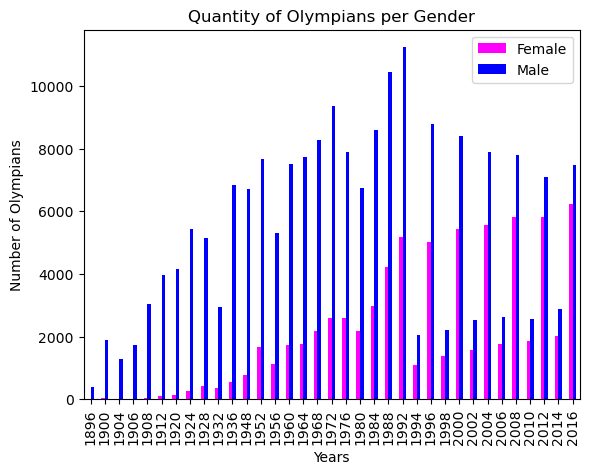

In [252]:
#_values = gender_data_merge['Year']
colors = ['magenta','blue']
ax = gender_data_merge.plot(x='Year', y=['Female', 'Male'], kind='bar',color=colors)
plt.ylabel('Number of Olympians')
plt.xlabel('Years')
plt.title('Quantity of Olympians per Gender')
plt.legend()
plt.show()

In [261]:
# female and male comparison

usa_events = athlete_events[athlete_events['Team'] == 'United States']
female_data = usa_events[usa_events['Sex'] == 'F']
female_data = female_data.groupby('Year')['Sex'].count()
female_data = pd.DataFrame(female_data).reset_index()
female_data.rename(columns={'Sex':'Female'}, inplace=True)
male_data = usa_events[usa_events['Sex'] == 'M']
male_data = male_data.groupby('Year')['Sex'].count()
male_data = pd.DataFrame(male_data).reset_index()
male_data.rename(columns={'Sex':'Male'}, inplace=True)
gender_data_merge_usa = pd.merge(female_data,male_data,on='Year',how='right')
gender_data_merge_usa

,Year,Female,Male
0,1896,NaN,27
1,1900,8.0,106
2,1904,12.0,811
3,1906,NaN,81
4,1908,NaN,219
5,1912,NaN,364
6,1920,22.0,451
7,1924,32.0,456
8,1928,57.0,390
9,1932,128.0,650


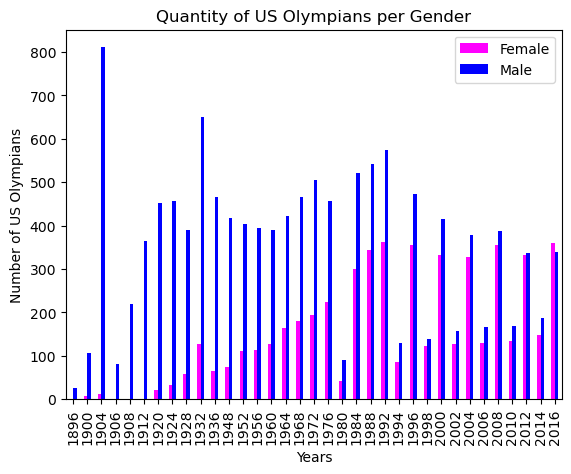

In [263]:
#_values = gender_data_merge['Year']
colors = ['magenta','blue']
ax = gender_data_merge_usa.plot(x='Year', y=['Female', 'Male'], kind='bar',color=colors)
plt.ylabel('Number of US Olympians')
plt.xlabel('Years')
plt.title('Quantity of US Olympians per Gender')
plt.legend()
plt.show()

In [267]:

usa_events_medalists = athlete_events_metalists[athlete_events_metalists['Team'] == 'United States']
female_data = usa_events_medalists[usa_events_medalists['Sex'] == 'F']
female_data = female_data.groupby('Year')['Sex'].count()
female_data = pd.DataFrame(female_data).reset_index()
female_data.rename(columns={'Sex':'Female'}, inplace=True)
male_data = usa_events[usa_events['Sex'] == 'M']
male_data = male_data.groupby('Year')['Sex'].count()
male_data = pd.DataFrame(male_data).reset_index()
male_data.rename(columns={'Sex':'Male'}, inplace=True)
gender_metalists_merge_usa = pd.merge(female_data,male_data,on='Year',how='right')
gender_metalists_merge_usa

,Year,Female,Male
0,1896,NaN,27
1,1900,4.0,106
2,1904,6.0,811
3,1906,NaN,81
4,1908,NaN,219
5,1912,NaN,364
6,1920,14.0,451
7,1924,20.0,456
8,1928,23.0,390
9,1932,29.0,650


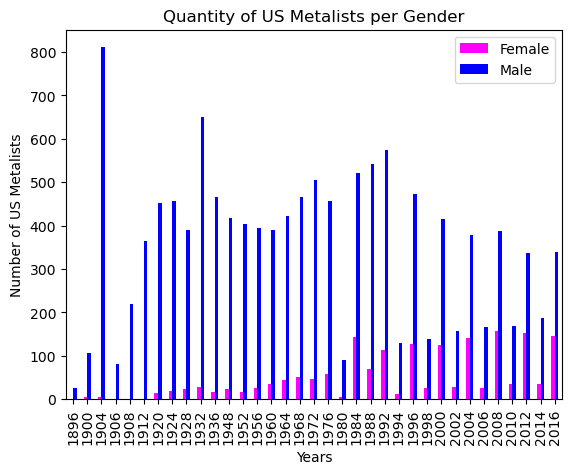

In [270]:
colors = ['magenta','blue']
ax = gender_metalists_merge_usa.plot(x='Year', y=['Female', 'Male'], kind='bar',color=colors)
plt.ylabel('Number of US Metalists')
plt.xlabel('Years')
plt.title('Quantity of US Metalists per Gender')
plt.legend()
plt.show()